<a href="https://colab.research.google.com/github/gonzolopez18/python_ia/blob/main/Practica_6_2_Transferencia_de_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generacion de dataset
usar siempre chrome para subir archivos


In [3]:
!unzip dataset/babuino/babuinos.zip -d babuino


Archive:  dataset/babuino/babuinos.zip
   creating: babuino/babuinos/
  inflating: babuino/__MACOSX/._babuinos  
  inflating: babuino/babuinos/depositphotos_378202542-stock-photo-baboons-monkey-siting-branch-safari.jpg  
  inflating: babuino/__MACOSX/babuinos/._depositphotos_378202542-stock-photo-baboons-monkey-siting-branch-safari.jpg  
  inflating: babuino/babuinos/images26.jpg  
  inflating: babuino/__MACOSX/babuinos/._images26.jpg  
  inflating: babuino/babuinos/images32.jpg  
  inflating: babuino/__MACOSX/babuinos/._images32.jpg  
  inflating: babuino/babuinos/babuino-de-hamadryas-7652419.jpg  
  inflating: babuino/__MACOSX/babuinos/._babuino-de-hamadryas-7652419.jpg  
  inflating: babuino/babuinos/ape-653705_640.jpg  
  inflating: babuino/__MACOSX/babuinos/._ape-653705_640.jpg  
  inflating: babuino/babuinos/image34.jpeg  
  inflating: babuino/__MACOSX/babuinos/._image34.jpeg  
  inflating: babuino/babuinos/coat-baboons-3387778_1920.jpg  
  inflating: babuino/__MACOSX/babuinos/._

In [4]:
!unzip dataset/jirafa/jirafas.zip -d jirafa

Archive:  dataset/jirafa/jirafas.zip
   creating: jirafa/jirafas/
  inflating: jirafa/__MACOSX/._jirafas  
  inflating: jirafa/jirafas/images26.jpg  
  inflating: jirafa/__MACOSX/jirafas/._images26.jpg  
  inflating: jirafa/jirafas/images32.jpg  
  inflating: jirafa/__MACOSX/jirafas/._images32.jpg  
  inflating: jirafa/jirafas/image34.jpeg  
  inflating: jirafa/__MACOSX/jirafas/._image34.jpeg  
  inflating: jirafa/jirafas/image22.jpeg  
  inflating: jirafa/__MACOSX/jirafas/._image22.jpeg  
  inflating: jirafa/jirafas/images123.jpg  
  inflating: jirafa/__MACOSX/jirafas/._images123.jpg  
  inflating: jirafa/jirafas/images137.jpg  
  inflating: jirafa/__MACOSX/jirafas/._images137.jpg  
  inflating: jirafa/jirafas/1610475996_695462_1610476047_noticia_normal_recorte1.jpg  
  inflating: jirafa/__MACOSX/jirafas/._1610475996_695462_1610476047_noticia_normal_recorte1.jpg  
  inflating: jirafa/jirafas/images136.jpg  
  inflating: jirafa/__MACOSX/jirafas/._images136.jpg  
  inflating: jirafa/jir

In [5]:
!rm -rf dataset/babuino
!rm -rf dataset/jirafa

In [7]:
!rm -rf babuino/__MACOSX
!rm -rf jirafa/__MACOSX

In [8]:
!cp -r babuino/babuinos dataset/babuino
!cp -r jirafa/jirafas dataset/jirafa

In [3]:
#si tengo un zip con ambas carpetas dentro

!unzip dataset.zip -d .
!rm -rf __MACOSX/


Archive:  dataset.zip
   creating: ./dataset/
   creating: ./dataset/jirafas/
  inflating: ./__MACOSX/dataset/._jirafas  
  inflating: ./dataset/.DS_Store     
  inflating: ./__MACOSX/dataset/._.DS_Store  
   creating: ./dataset/babuinos/
  inflating: ./__MACOSX/dataset/._babuinos  
  inflating: ./dataset/jirafas/images26.jpg  
  inflating: ./__MACOSX/dataset/jirafas/._images26.jpg  
  inflating: ./dataset/jirafas/images32.jpg  
  inflating: ./__MACOSX/dataset/jirafas/._images32.jpg  
  inflating: ./dataset/jirafas/image34.jpeg  
  inflating: ./__MACOSX/dataset/jirafas/._image34.jpeg  
  inflating: ./dataset/jirafas/image22.jpeg  
  inflating: ./__MACOSX/dataset/jirafas/._image22.jpeg  
  inflating: ./dataset/jirafas/images123.jpg  
  inflating: ./__MACOSX/dataset/jirafas/._images123.jpg  
  inflating: ./dataset/jirafas/images137.jpg  
  inflating: ./__MACOSX/dataset/jirafas/._images137.jpg  
  inflating: ./dataset/jirafas/1610475996_695462_1610476047_noticia_normal_recorte1.jpg  
  in

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generator
datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 10,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size = (224,224),
                                                     batch_size = 32,
                                                     shuffle = True,
                                                     subset = "training")


data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size = (224,224),
                                                     batch_size = 32,
                                                     shuffle = True,
                                                     subset = "validation")


Found 443 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


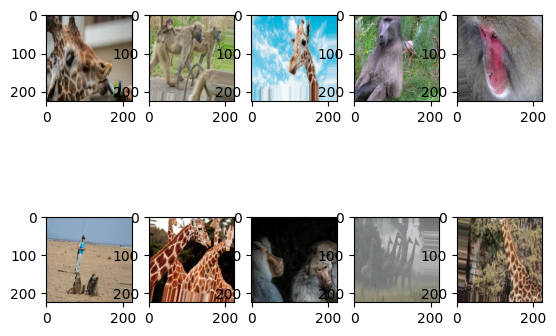

In [13]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [14]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224,3))


In [24]:
#Importante
#congelar las capas, porque ya está entrenado

mobilenetv2.trainable = False



In [25]:
modelo = tf.keras.Sequential([mobilenetv2,
                              tf.keras.layers.Dense(2, activation="softmax")
                              ])

In [26]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [28]:
EPOCAS = 50

entrenamiento = modelo.fit(
    batch_images,
    batch_labels,
    epochs = EPOCAS,
    batch_size=32,  # Make sure this matches the batch size in your data generator
    validation_data=data_gen_pruebas
)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.4569 - accuracy: 0.8750 - val_loss: 0.3803 - val_accuracy: 0.8636
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.3658 - accuracy: 0.9062 - val_loss: 0.3006 - val_accuracy: 0.9273
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.2847 - accuracy: 0.9375 - val_loss: 0.2897 - val_accuracy: 0.9182
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.2177 - accuracy: 1.0000 - val_loss: 0.2411 - val_accuracy: 0.9545
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.1676 - accuracy: 1.0000 - val_loss: 0.2032 - val_accuracy: 0.9727
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.1319 - accuracy: 1.0000 - val_loss: 0.1885 - val_accuracy: 0.9545
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 0.1061 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 0.9727
Epoch 8/50
1/1 [=========================

In [29]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [30]:
ruta = "/content/baboon.jpg"

predicion = categorizar(ruta)
print(predicion)  # 0 para babuino, 1 para jirafa

1/1 [==============================] - 1s 1s/step
0


In [32]:
ruta = "/content/jirafa1.jpeg"

predicion = categorizar(ruta)
print(predicion)  # 0 para babuino, 1 para jirafa

1/1 [==============================] - 0s 55ms/step
1
